# SC1015 FEL1 Group 2 - *Project Title*
## Done by Jordan Choi, Kye Yong and Yu Kai

### Variables Used & Description
<hr>

### Dataset Description
#### Primary Dataset *"anime-dataset-2023"*
Contains anime information

<table style="width: 100%; text-align: left">
    <tr>
        <th>Field Name</th>
        <th>Field Description</th>
    </tr>
    <tr>
        <td>anime_id</td>
        <td>Unique ID for each anime.</td>
    </tr>
    <tr>
        <td>Name</td>
        <td>The name of the anime in its original language.</td>
    </tr>
    <tr>
        <td>English Name</td>
        <td>The English name of the anime.</td>
    </tr>
    <tr>
        <td>Other Name</td>
        <td>Other names or titles of the anime in different languages.</td>
    </tr>
    <tr>
        <td>Score</td>
        <td>The score or rating given to the anime.</td>
    </tr>
    <tr>
        <td>Genres</td>
        <td>The genres of the anime, separated by commas.</td>
    </tr>
    <tr>
        <td>Synopsis</td>
        <td>A brief description or summary of the anime's plot.</td>
    </tr>
    <tr>
        <td>Type</td>
        <td>The type of the anime (e.g., TV series, movie, OVA, etc.).</td>
    </tr>
    <tr>
        <td>Episodes</td>
        <td>The number of episodes in the anime.</td>
    </tr>
    <tr>
        <td>Aired</td>
        <td>The dates when the anime was aired.</td>
    </tr>
    <tr>
        <td>Premiered</td>
        <td>The season and year when the anime premiered.</td>
    </tr>
    <tr>
        <td>Status</td>
        <td>The status of the anime (e.g., Finished Airing, Currently Airing, etc.)</td>
    </tr>
    <tr>
        <td>Producers</td>
        <td>The production companies or producers of the anime.</td>
    </tr>
    <tr>
        <td>Licensors</td>
        <td>The licensors of the anime (e.g., streaming platforms).</td>
    </tr>
    <tr>
        <td>Studios</td>
        <td>The animation studios that worked on the anime.</td>
    </tr>
    <tr>
        <td>Source</td>
        <td>The source material of the anime (e.g., manga, light novel, original).</td>
    </tr>
    <tr>
        <td>Duration</td>
        <td>The duration of each episode.</td>
    </tr>
    <tr>
        <td>Rating</td>
        <td>The age rating of the anime.</td>
    </tr>
    <tr>
        <td>Rank</td>
        <td>The rank of the anime based on popularity or other criteria.</td>
    </tr>
    <tr>
        <td>Popularity</td>
        <td>The popularity rank of the anime.</td>
    </tr>
    <tr>
        <td>Favorites</td>
        <td>The number of times the anime was marked as a favorite by users.</td>
    </tr>
    <tr>
        <td>Scored By</td>
        <td>The number of users who scored the anime.</td>
    </tr>
    <tr>
        <td>Members</td>
        <td>The number of members who have added the anime to their list on the platform.</td>
    </tr>
    <tr>
        <td>Image URL</td>
        <td>The URL of the anime's image or poster.</td>
    </tr>
</table>
<hr>

In [2]:
# Import the Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split

# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder

def convertDuration(duration):
    if pd.isnull(duration) or "Unknown" in duration:
        return np.nan # For missing or unknown duration
    hours = re.search(r'(\d+)\s*hr', duration) # Hours
    mins = re.search(r'(\d+)\s*min', duration) # Mins
    
    totalMins = 0
    if hours:
        totalMins += int(hours.group(1)) * 60 # Convert Hours to Mins
    if mins:
        totalMins += int(mins.group(1)) # Add mins
    return totalMins


# Import & Clean "Anime Dataset 2023" Dataset
#anime_data = pd.read_csv("dataset/anime-dataset-2023.csv")
anime_data = pd.read_csv("anime-dataset-2023.csv")
anime_data.head(len(anime_data))

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24900,55731,Wu Nao Monu,UNKNOWN,无脑魔女,UNKNOWN,"Comedy, Fantasy, Slice of Life",No description available for this anime.,ONA,15.0,"Jul 4, 2023 to ?",...,UNKNOWN,Web manga,Unknown,PG-13 - Teens 13 or older,UNKNOWN,24723,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1386/...
24901,55732,Bu Xing Si: Yuan Qi,Blader Soul,捕星司·源起,UNKNOWN,"Action, Adventure, Fantasy",No description available for this anime.,ONA,18.0,"Jul 27, 2023 to ?",...,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1383/...
24902,55733,Di Yi Xulie,The First Order,第一序列,UNKNOWN,"Action, Adventure, Fantasy, Sci-Fi",No description available for this anime.,ONA,16.0,"Jul 19, 2023 to ?",...,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1130/...
24903,55734,Bokura no Saishuu Sensou,UNKNOWN,僕らの最終戦争,UNKNOWN,UNKNOWN,A music video for the song Bokura no Saishuu S...,Music,1.0,"Apr 23, 2022",...,UNKNOWN,Original,3 min,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1931/...


In [3]:
# Check the basic information of the dataset.
print(anime_data.dtypes)

anime_id         int64
Name            object
English name    object
Other name      object
Score           object
Genres          object
Synopsis        object
Type            object
Episodes        object
Aired           object
Premiered       object
Status          object
Producers       object
Licensors       object
Studios         object
Source          object
Duration        object
Rating          object
Rank            object
Popularity       int64
Favorites        int64
Scored By       object
Members          int64
Image URL       object
dtype: object


## Data Cleanup

#### anime_id - done
in order, retaining in case we're analysing other datasets.

#### Name - done
in order, crucial to analyse. Will serve as the primary name since there are 3 different identifiers and this contains unique values for all rows. 

#### English name - done
to retain, so that we can find out whether the existence of an English name affects the score. 
There seem to be 3 cases: 
"English Name" is same as "Name", 
"Name" contains words of other languages and "English Name" differs from "Name", 
or "English Name" is "UNKNOWN".

#### Other name - done
to remove from dataframe, since majority of the values are the Japanese Hiragana name, which none of us understands and is probably irrelevant.

#### Score - Partially Done
Crucial Field. The type of this field in the raw dataset is "object". To convert to decimal values. Contains 9213 fields with "UNKNOWN"
We will use the following approach to replace the values of Unknown.

1) Find out the correlation of score with other likely fields, such as Rank and Popularity.
2) Separate into different bins, and use the mean/median score of the corresponding bin to replace the "UNKNOWN" value.

#### Genres - Done
Some titles may contain more than 1 genre, hence, multi-label binarization will be used to clean up this column. A unique column label will be created for each genre. Binary values (0 or 1) will be used to indicate if the title belongs to the respective genre.

4929 titles with "Unknown" genres, will remain as 0 for all genres.

#### Synopsis - Done
We will leave the sypnosis as it is. We may or may not use it, depending if we can implement a language model to analyse this texts. There are 4535 without description - "No description available for this anime".

#### Type - Done
Categorical Data, will be converted to a numeral value to represent each category.
- Movie | NA
- Music | NA
- ONA   | 10
- OVA   | 20
- Special | NA
- TV    | 30
- Unknown | NA

There are 74 titles with unknown type in the raw dataset. Will be expelled from dataframe. Done

Almost all of 2686 titles with "Music" category are Animated Music Videos with less than 10 mins "Duration" time. We're not interested in this hence will be expelled from the dataframe. Done

"Movie" and "Special" titles will also be expelled from the dataframe, since we're only interested in the analysis of anime series - aired either on TV, Online Streaming Platforms (ONA), or Home Video Release (OVA). Done


#### Episodes - To Do
611 titles with "unknown" number of episodes. Some of these contain popular titles - like "Detective Conan".
We will use the following approach to replace the values of Unknown.

Priority 1 - Since most anime are typically released weekly, we will calculate the number of weeks each anime is aired for if available. Then, we will get the average numbers of episodes released in a week. When the figure is available, we will estimate the number of episodes for titles with unknown episodes, through the number of running weeks * average number of episodes/week.

Priority 2 - If the type is available, we will categorize into bins, and replace the unknown values of the bins with the average number of episodes for the type.

The accurate value of episodes is likely irrelevant, hence a range can be considered to be used. (Eg. < 50, <100, <200, <300, <400, <500)

#### Aired - Done
Will be separated into start and end date. Is the day field necessary? 
Air dates of 915 titles are "Not Available". We will replace these with "NaT".
End Dates which are empty or "?" are replaced with NaT, indicating that anime is probably still on air.

#### Premiered
The season where the title was first released.
19399 titles are "UNKNOWN".
This column will be processed by using the "Start Date" of the title to determine the season the anime was released on.

#### Status - Done
Use SKLearn's Label Encoder to Convert the Categorical Data Represented Through Text Description to Numerical Representation. 0 = Currently Airing, 1 = Finished Airing and 2 = Not Yet Air

#### Producers - Done
Use Multi-Label Binarization to represent the producers for each titles, since a title may be produced by more than 1 production company.

#### Licensors - Done
20170 titles are "UNKNOWN", it is unlikely this column can provide any valuable insights on our problem. This column will be expelled from the data since majority of the values are UNKNOWN.

#### Studios - Done
10526 titles are "UNKNOWN'. Since the studios who produced the anime titles could be an important factor to determine the success of an anime title, this column will be retained. Titles can be a collaboration of more than 1 studios, hence, we will follow a similar approach to Genres. Multi-label binarization will be employed. A unique column label will be created for each studio. Binary values (0 or 1) will be used to indicate if the title belongs to the respective studio.

UNKNOWN titles will have 0s in all known studios.

#### Source
Will be converted to Numerical Values to represent the categories.

- 4-koma manga
- Book
- Card Game
- Game
- Light Novel
- Manga
- Mixed Media
- Music
- Novel
- Original
- Other
- Picture Book
- Radio
- Unknown
- Visual Novel
- Web Manga
- Web Novel

Since the source is unlikely possible to be determined through other columns, unknown will remain as unknown - 3689 titles.

#### Duration
In the raw data, duration is difficult to process as it is represented as an object. All values will be converted to minutes, represented in numerical value.

Any titles with less than 10 minutes running time will be expelled, as it is unlikely to be an anime series we're trying to study.


#### Rating
All values will be converted to numerical values to represent various categorical value.

G - All Ages
PG - Children
PG-13 - Teens 13 or older
R - 17+ (violence)
R+ - Mild Nudity
Rx - Hentai
UNKNOWN

669 titles have Unknown ratings. Will remain as unknown since it is unlikely to estimate from other columns.

#### Rank
4612 titles has unknown ranks.
187 titles has Rank "0" - it is invalid as each rank should be unique exclusively to each title. Hence this will be treated as unknown data.

#### Popularity
187 titles with Popularity "0"
1 title with no popularity value.

#### Favorites
167 titles with Favorites "0"

#### Scored By
9213 values with "Unknown". Will be replaced with the median values of "Scored By" column.

#### Members
No cleaning required. Data is processable.

#### Image URL
No cleaning required. Can consider to remove, but perhaps we can use machine learning to determine whether poster image affects the success of an anime.


### Data Cleansing

##### Cleaning - Unnecessary Columns

In [8]:
# Copy the raw data into a new dataframe for cleaning.
anime_cleaned_df = anime_data.copy()

# Drop unnecessary columns that are irrelevant to our analysis or unmeaningful due to Unknown values
# - "Other Name", "Premiered", "Licensors" 
anime_cleaned_df = anime_cleaned_df.drop(['Other name', 'Licensors'], axis=1)

# Check if the columns are dropped successfully.
anime_cleaned_df.dtypes

anime_id         int64
Name            object
English name    object
Score           object
Genres          object
Synopsis        object
Type            object
Episodes        object
Aired           object
Premiered       object
Status          object
Producers       object
Studios         object
Source          object
Duration        object
Rating          object
Rank            object
Popularity       int64
Favorites        int64
Scored By       object
Members          int64
Image URL       object
dtype: object

##### Cleaning - "Type" Column

In [10]:
# Drop rows with "Music", "Movie", "Special" value of Type. Retaining only "TV", "ONA" and "OVA" - which are our focus of this project.
# Remove these rows by filtering those values of Type using "isin()"

# Filter the DataFrame to exclude rows where the "Type" column is "Movie", "Music", or "Special"
anime_cleaned_df = anime_cleaned_df[~anime_cleaned_df['Type'].isin(['Movie', 'Music', 'Special', 'UNKNOWN'])]

# Check if rows are dropped successfully.
filtered_df = anime_cleaned_df[anime_cleaned_df['Type'].isin(['Movie', 'Music', 'Special', 'UNKNOWN'])]
filtered_df

anime_cleaned_df.describe()

,anime_id,Popularity,Favorites,Members
count,15206.000000,15206.000000,15206.000000,1.520600e+04
mean,28358.823491,11516.737472,649.390833,5.149600e+04
std,18396.556175,7524.147345,5436.525592,1.912491e+05
min,1.000000,0.000000,0.000000,0.000000e+00
25%,8194.250000,4963.500000,0.000000,2.390000e+02
50%,33774.000000,10624.000000,3.000000,1.943500e+03
75%,45464.750000,17985.250000,40.000000,1.519250e+04
max,55733.000000,24723.000000,217606.000000,3.744541e+06


##### Cleaning - "English name" Column

In [12]:
# Since most values in 'English names' are the same as the "Name" column, replace duplicate values with "NaN" value.
anime_cleaned_df['English name'] = anime_cleaned_df.apply(lambda row: 1 if row['English name'] == row['Name'] else row['English name'], axis=1)

In [13]:
# Replace "Unknown" values with "NaN" value.
anime_cleaned_df['English name'].replace("UNKNOWN", None, inplace=True)

/var/folders/yp/cqfn_01x5xn8ls99sxkzqp980000gn/T/ipykernel_62366/2500763825.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  anime_cleaned_df['English name'].replace("UNKNOWN", None, inplace=True)


In [14]:
# Verify if "UNKNOWN" values are replaced by "NaN" value successfully.
filtered_df = anime_cleaned_df[anime_cleaned_df['English name'] == 'UNKNOWN']
filtered_df

,anime_id,Name,English name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL


In [15]:
# Check if the 9213 Unknown values for Score and Scored By are equal - that means 
filtered_df = anime_cleaned_df[anime_cleaned_df['Score'] == 'UNKNOWN']
filtered_df2 = anime_cleaned_df[anime_cleaned_df['Scored By'] == 'UNKNOWN']
are_equal = filtered_df.equals(filtered_df2)
print(are_equal)

True


##### Cleaning - "Score" Column

In [17]:
type(anime_cleaned_df)

pandas.core.frame.DataFrame

In [18]:
# Set Unknown Values of Score to "NaN" first.

In [19]:
anime_cleaned_df['Score'] = anime_cleaned_df['Score'].replace("Unknown", np.nan)
anime_cleaned_df['Score'] = pd.to_numeric(anime_cleaned_df['Score'], errors='coerce')

In [20]:
# Verify if "UNKNOWN" values are replaced by "NaN" value successfully.
filtered_df = anime_cleaned_df[anime_cleaned_df['Score'] == 'UNKNOWN']
filtered_df

### NEED TO REPLACE UNKNOWN VALUES!

,anime_id,Name,English name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL


##### Cleaning - "Genre" Column - Use Multi Label Binarization

In [22]:
# Split the genre into a list
anime_cleaned_df['Genres List'] = anime_cleaned_df['Genres'].apply(lambda x: x.split(", "))

# Initialize the MultiLabelBinarizer and fit into the list
mlb = MultiLabelBinarizer()
encoded_genres = mlb.fit_transform(anime_cleaned_df['Genres List'])

# DataFrame for Encoded Genres 
genres_df = pd.DataFrame(encoded_genres, columns=mlb.classes_, index=anime_cleaned_df.index)

# Drop the UNKNOWN category from genres_df
genres_df = genres_df.drop(['UNKNOWN'], axis=1, errors='ignore')

# Add 'anime_id' and 'Name' to genres_df to maintain a key and readable reference for merging
genres_df = genres_df.join(anime_cleaned_df['anime_id'])
genres_df = genres_df.join(anime_cleaned_df['Name'])

# Drop Genres List and Genres from cleansed dataframe.
# Not working -anime_cleaned_df.drop(columns=['Genres','Genres List'])
anime_cleaned_df = anime_cleaned_df.drop(['Genres', 'Genres List'], axis=1)

# Merge into the original anime dataframe using join.
#anime_cleaned_df = anime_cleaned_df.join(genres_df)

# Reorganize the Genres Dataframe Column Order.
new_column_order = ['anime_id', 'Name']

# Append remaining columns that are not explicitly ordered
remaining_columns = [col for col in genres_df.columns if col not in new_column_order]
new_column_order.extend(remaining_columns)

genres_df = genres_df[new_column_order]

In [23]:
# Loop through the genre columns with binary values - check if they are classes generated by mlb.
genre_columns = [col for col in genres_df.columns if col in mlb.classes_]  # mlb.classes_ contains the genre names

# Replace NaN values in genre columns with 0
genres_df[genre_columns] = genres_df[genre_columns].fillna(0)

# Convert genre columns to int64
genres_df[genre_columns] = genres_df[genre_columns].astype('int64')

print(anime_cleaned_df.dtypes)
print(genres_df.dtypes)

anime_id          int64
Name             object
English name     object
Score           float64
Synopsis         object
Type             object
Episodes         object
Aired            object
Premiered        object
Status           object
Producers        object
Studios          object
Source           object
Duration         object
Rating           object
Rank             object
Popularity        int64
Favorites         int64
Scored By        object
Members           int64
Image URL        object
dtype: object
anime_id          int64
Name             object
Action            int64
Adventure         int64
Avant Garde       int64
Award Winning     int64
Boys Love         int64
Comedy            int64
Drama             int64
Ecchi             int64
Erotica           int64
Fantasy           int64
Girls Love        int64
Gourmet           int64
Hentai            int64
Horror            int64
Mystery           int64
Romance           int64
Sci-Fi            int64
Slice of Life     int64
Sp

In [24]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

##### Cleaning - "Synopsis" Column - Replace "No description available for this anime." with NA value

In [26]:
anime_cleaned_df['Synopsis'] = anime_cleaned_df['Synopsis'].replace("No description available for this anime.", pd.NA)

In [27]:
# Verify if "UNKNOWN" values are replaced by "NA" value successfully.
filtered_df = anime_cleaned_df[anime_cleaned_df['Synopsis'] == "No description available for this anime."]
filtered_df

,anime_id,Name,English name,Score,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL


In [28]:
# Check anime titles with "UNKNOWN" numbers of episodes.
filtered_df = anime_cleaned_df[anime_cleaned_df['Episodes'] == "UNKNOWN"]
filtered_df

,anime_id,Name,English name,Score,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
11,21,One Piece,1,8.69,"Gol D. Roger was known as the ""Pirate King,"" t...",TV,UNKNOWN,"Oct 20, 1999 to ?",fall 1999,Currently Airing,"Fuji TV, TAP, Shueisha",Toei Animation,Manga,24 min,PG-13 - Teens 13 or older,55.0,20,198986,1226493.0,2168904,https://cdn.myanimelist.net/images/anime/6/732...
211,235,Detective Conan,Case Closed,8.17,"Shinichi Kudou, a high school student of astou...",TV,UNKNOWN,"Jan 8, 1996 to ?",winter 1996,Currently Airing,"Yomiuri Telecasting, TMS-Kyokuchi, Shogakukan",TMS Entertainment,Manga,25 min,PG-13 - Teens 13 or older,382.0,653,13964,154061.0,334559,https://cdn.myanimelist.net/images/anime/7/751...
871,966,Crayon Shin-chan,Shin Chan,7.77,There is no such thing as an uneventful day in...,TV,UNKNOWN,"Apr 13, 1992 to ?",spring 1992,Currently Airing,TV Asahi,Shin-Ei Animation,Manga,21 min,G - All Ages,972.0,2228,1178,39023.0,79676,https://cdn.myanimelist.net/images/anime/10/59...
1093,1199,Nintama Rantarou,None,7.07,"Taking place in the Sengoku Period, Rantarou, ...",TV,UNKNOWN,"Apr 10, 1993 to ?",spring 1993,Currently Airing,NHK,Ajia-do,Manga,10 min,G - All Ages,3681.0,6925,68,2346.0,7180,https://cdn.myanimelist.net/images/anime/6/740...
1787,1960,Sore Ike! Anpanman,None,6.53,"One night, a Star of Life falls down the chimn...",TV,UNKNOWN,"Oct 3, 1988 to ?",fall 1988,Currently Airing,"Sotsu, Nippon Television Network",TMS Entertainment,Picture book,24 min,PG - Children,6222.0,8982,25,1146.0,3545,https://cdn.myanimelist.net/images/anime/1902/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24889,55720,Tensura × Genyoha,None,NaN,A collaboration anime between Genjitsu no Yoha...,ONA,UNKNOWN,"Jun 21, 2023 to ?",UNKNOWN,Not yet aired,UNKNOWN,UNKNOWN,Original,Unknown,UNKNOWN,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1615/...
24890,55721,See You on Our Veranda,None,NaN,<NA>,ONA,UNKNOWN,2023 to ?,UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,Web novel,6 min,PG - Children,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/img/sp/icon/apple-...
24891,55722,No More Princes,None,NaN,html.serialization_informationFIN.\nジャンル\nFant...,ONA,UNKNOWN,2023 to ?,UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,Web novel,5 min,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/img/sp/icon/apple-...
24892,55723,The Forgotten Princess Just Wants Peace,None,NaN,I'm the daughter of a Duke?!\nWhile locked up ...,ONA,UNKNOWN,"May 31, 2023 to ?",UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,Web novel,4 min,G - All Ages,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1887/...


In [29]:
# Clean Up "Aired" 

# Replace "Not Available" to "NaT"
anime_cleaned_df['Aired'] = anime_cleaned_df['Aired'].replace("Not available", pd.NaT)

# Split the Start and End Date into a new corresponding column Start Date and End Date based on the " to " separator
anime_cleaned_df[['Start Date','End Date']] = anime_cleaned_df['Aired'].str.split(' to ', expand=True)

# Convert Start Date & End Date to DateTime Format and coerce errors for Invalid Dates
anime_cleaned_df['Start Date'] = pd.to_datetime(anime_cleaned_df['Start Date'], errors = 'coerce')
anime_cleaned_df['End Date'] = pd.to_datetime(anime_cleaned_df['End Date'], errors = 'coerce')

# Anime titles with Partial Dates
# Extract and Process Anime Titles with Only Year Values
anime_cleaned_df['Start Date'] = anime_cleaned_df['Start Date'].fillna(anime_cleaned_df['Aired'].str.extract(r'(\d{4})')[0])
anime_cleaned_df['Start Date'] = pd.to_datetime(anime_cleaned_df['Start Date'], format='%Y', errors='coerce')

# Code to join for analysis.
# combined_df = anime_cleaned_df.merge(genres_df, on='anime_id', how='left')

In [30]:
#pd.set_option('display.max_rows', None)
anime_cleaned_df

,anime_id,Name,English name,Score,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL,Start Date,End Date
0,1,Cowboy Bebop,1,8.75,"Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Bandai Visual,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...,1998-04-03,1999-04-24
2,6,Trigun,1,8.22,"Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Finished Airing,Victor Entertainment,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...,1998-04-01,1998-09-30
3,7,Witch Hunter Robin,1,7.25,Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",summer 2002,Finished Airing,"Bandai Visual, Dentsu, Victor Entertainment, T...",Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...,2002-07-03,2002-12-25
4,8,Bouken Ou Beet,Beet the Vandel Buster,6.94,It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",fall 2004,Finished Airing,"TV Tokyo, Dentsu",Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...,2004-09-30,2005-09-29
5,15,Eyeshield 21,None,7.92,"Shy, reserved, and small-statured, Deimon High...",TV,145.0,"Apr 6, 2005 to Mar 19, 2008",spring 2005,Finished Airing,"TV Tokyo, Nihon Ad Systems, TV Tokyo Music, Sh...",Gallop,Manga,23 min per ep,PG-13 - Teens 13 or older,688.0,1252,1997,86524.0,177688,https://cdn.myanimelist.net/images/anime/1079/...,2005-04-06,2008-03-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24894,55725,4 Week Lovers,None,NaN,Wanna fake-date for 4 weeks?\nDojun's life at ...,ONA,10.0,"Apr 4, 2023 to ?",UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,Web manga,5 min per ep,UNKNOWN,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1443/...,2023-04-04,NaT
24895,55726,"Die, Please!",None,NaN,I just want to tell him how I feel!\nMina has ...,ONA,UNKNOWN,"May 31, 2023 to ?",UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,Web manga,5 min,G - All Ages,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1621/...,2023-05-31,NaT
24900,55731,Wu Nao Monu,None,NaN,<NA>,ONA,15.0,"Jul 4, 2023 to ?",UNKNOWN,Not yet aired,UNKNOWN,UNKNOWN,Web manga,Unknown,PG-13 - Teens 13 or older,UNKNOWN,24723,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1386/...,2023-07-04,NaT
24901,55732,Bu Xing Si: Yuan Qi,Blader Soul,NaN,<NA>,ONA,18.0,"Jul 27, 2023 to ?",UNKNOWN,Not yet aired,UNKNOWN,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1383/...,2023-07-27,NaT


##### Cleaning - "Status" Column - Replace current "Categorical Data" into numerical form to represent each category. 0 = Currently Airing, 1 = Finished Airing, 2 = Not Yet Aired

In [32]:
# Initialize Label Encoder from sklearn
label_encoder = LabelEncoder()
anime_cleaned_df['Status Code'] = label_encoder.fit_transform(anime_cleaned_df['Status'])


In [33]:
print(label_encoder.classes_)

['Currently Airing' 'Finished Airing' 'Not yet aired']


In [34]:
anime_cleaned_df

,anime_id,Name,English name,Score,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL,Start Date,End Date,Status Code
0,1,Cowboy Bebop,1,8.75,"Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Bandai Visual,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...,1998-04-03,1999-04-24,1
2,6,Trigun,1,8.22,"Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Finished Airing,Victor Entertainment,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...,1998-04-01,1998-09-30,1
3,7,Witch Hunter Robin,1,7.25,Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",summer 2002,Finished Airing,"Bandai Visual, Dentsu, Victor Entertainment, T...",Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...,2002-07-03,2002-12-25,1
4,8,Bouken Ou Beet,Beet the Vandel Buster,6.94,It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",fall 2004,Finished Airing,"TV Tokyo, Dentsu",Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...,2004-09-30,2005-09-29,1
5,15,Eyeshield 21,None,7.92,"Shy, reserved, and small-statured, Deimon High...",TV,145.0,"Apr 6, 2005 to Mar 19, 2008",spring 2005,Finished Airing,"TV Tokyo, Nihon Ad Systems, TV Tokyo Music, Sh...",Gallop,Manga,23 min per ep,PG-13 - Teens 13 or older,688.0,1252,1997,86524.0,177688,https://cdn.myanimelist.net/images/anime/1079/...,2005-04-06,2008-03-19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24894,55725,4 Week Lovers,None,NaN,Wanna fake-date for 4 weeks?\nDojun's life at ...,ONA,10.0,"Apr 4, 2023 to ?",UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,Web manga,5 min per ep,UNKNOWN,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1443/...,2023-04-04,NaT,1
24895,55726,"Die, Please!",None,NaN,I just want to tell him how I feel!\nMina has ...,ONA,UNKNOWN,"May 31, 2023 to ?",UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,Web manga,5 min,G - All Ages,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1621/...,2023-05-31,NaT,1
24900,55731,Wu Nao Monu,None,NaN,<NA>,ONA,15.0,"Jul 4, 2023 to ?",UNKNOWN,Not yet aired,UNKNOWN,UNKNOWN,Web manga,Unknown,PG-13 - Teens 13 or older,UNKNOWN,24723,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1386/...,2023-07-04,NaT,2
24901,55732,Bu Xing Si: Yuan Qi,Blader Soul,NaN,<NA>,ONA,18.0,"Jul 27, 2023 to ?",UNKNOWN,Not yet aired,UNKNOWN,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1383/...,2023-07-27,NaT,2


##### Cleaning - "Producers" Column, Use Multi Label Binarization to represent the producers for each titles through 1 and 0s.

In [36]:
# Can drop the following columns since it is already re-processed.
#anime_cleaned_df = anime_cleaned_df.drop(['Genres', 'Status', 'Genres List'], axis=1)

### Consider to separate "Not yet aired" data from the Main Dataframe, since we're not interested to analyse those.

In [37]:
# Split the genre into a list
anime_cleaned_df['Producers_List'] = anime_cleaned_df['Producers'].apply(lambda x: x.split(", "))

# Initialize the MultiLabelBinarizer and fit into the list
mlb = MultiLabelBinarizer()
encoded_producers = mlb.fit_transform(anime_cleaned_df['Producers_List'])

# DataFrame for Encoded Genres 
producers_df = pd.DataFrame(encoded_producers, columns=mlb.classes_, index=anime_cleaned_df.index)

# Drop the UNKNOWN category from genres_df
producers_df = producers_df.drop(['UNKNOWN'], axis=1, errors='ignore')

# Add 'anime_id' and 'Name' to genres_df to maintain a key and readable reference for merging
producers_df = producers_df.join(anime_cleaned_df['anime_id'])
producers_df = producers_df.join(anime_cleaned_df['Name'])

# Drop Genres List and Genres from cleansed dataframe.
# Not working -anime_cleaned_df.drop(columns=['Genres','Genres List'])
anime_cleaned_df = anime_cleaned_df.drop(['Producers', 'Producers_List'], axis=1)

# Merge into the original anime dataframe using join.
#anime_cleaned_df = anime_cleaned_df.join(producers_df)

# Reorganize the Genres Dataframe Column Order.
new_column_order = ['anime_id', 'Name']

# Append remaining columns that are not explicitly ordered
remaining_columns = [col for col in producers_df.columns if col not in new_column_order]
new_column_order.extend(remaining_columns)

producers_df = producers_df[new_column_order]

# Loop through the genre columns with binary values - check if they are classes generated by mlb.
producers_columns = [col for col in producers_df.columns if col in mlb.classes_]  # mlb.classes_ contains the producers names

# Replace NaN values in producers columns with 0
producers_df[producers_columns] = producers_df[producers_columns].fillna(0)

# Convert genre columns to int64
producers_df[producers_columns] = producers_df[producers_columns].astype('int64')

print(anime_cleaned_df.dtypes)
print()
print(producers_df.dtypes)

anime_id                 int64
Name                    object
English name            object
Score                  float64
Synopsis                object
Type                    object
Episodes                object
Aired                   object
Premiered               object
Status                  object
Studios                 object
Source                  object
Duration                object
Rating                  object
Rank                    object
Popularity               int64
Favorites                int64
Scored By               object
Members                  int64
Image URL               object
Start Date      datetime64[ns]
End Date        datetime64[ns]
Status Code              int64
dtype: object

anime_id             int64
Name                object
12 Diary Holders     int64
1IN                  int64
1st PLACE            int64
                     ...  
pH Studio            int64
project lights       int64
studioGONG           int64
syn Sophia           int64
ta

In [38]:
anime_cleaned_df
producers_df

anime_id                 Name  12 Diary Holders  1IN  1st PLACE  \
0             1         Cowboy Bebop                 0    0          0   
2             6               Trigun                 0    0          0   
3             7   Witch Hunter Robin                 0    0          0   
4             8       Bouken Ou Beet                 0    0          0   
5            15         Eyeshield 21                 0    0          0   
...         ...                  ...               ...  ...        ...   
24894     55725        4 Week Lovers                 0    0          0   
24895     55726         Die, Please!                 0    0          0   
24900     55731          Wu Nao Monu                 0    0          0   
24901     55732  Bu Xing Si: Yuan Qi                 0    0          0   
24902     55733          Di Yi Xulie                 0    0          0   

       3xCube  4Kids Entertainment  5pb.  7ji  81 Produce  8PAN  A-1 Pictures  \
0           0                    0     0    0           0     0             0   
2           0                    0     0    0           0     0             0   
3           0                    0     0    0           0     0             0   
4           0                    0     0    0           0     0             0   
5           0                    0     0    0           0     0             0   
...       ...                  ...   ...  ...         ...   ...           ...   
24894       0                    0     0    0           0     0             0   
24895       0                    0     0    0           0     0             0   
24900       0                    0     0    0           0     0             0   
24901       0                    0     0    0           0     0             0   
24902       0                    0     0    0           0     0             0   

       A-Craft  A-Line  A-Sketch  A3  ABC Animation  ABC Frontier  AC Create  \
0            0       0         0   0              0             0          0   
2            0       0         0   0              0             0          0   
3            0       0         0   0              0             0          0   
4            0       0         0   0              0             0          0   
5            0       0         0   0              0             0          0   
...        ...     ...       ...  ..            ...           ...        ...   
24894        0       0         0   0              0             0          0   
24895        0       0         0   0              0             0          0   
24900        0       0         0   0              0             0          0   
24901        0       0         0   0              0             0          0   
24902        0       0         0   0              0             0          0   

       AC-Bu  ADK  ADK Emotions  ADK Marketing Solutions  AG-ONE  \
0          0    0             0                        0       0   
2          0    0             0                        0       0   
3          0    0             0                        0       0   
4          0    0             0                        0       0   
5          0    0             0                        0       0   
...      ...  ...           ...                      ...     ...   
24894      0    0             0                        0       0   
24895      0    0             0                        0       0   
24900      0    0             0                        0       0   
24901      0    0             0                        0       0   
24902      0    0             0                        0       0   

       AHA Entertainment  AIC  AIC RIGHTS  AIR AGENCY  AKABEiSOFT2  \
0                      0    0           0           0            0   
2                      0    0           0           0            0   
3                      0    0           0           0            0   
4                      0    0           0           0            0   
5                

##### Cleaning - "Studios" Column, Use Multi Label Binarization to represent the Studios for each titles through 1 and 0s.

In [40]:
# Split the genre into a list
anime_cleaned_df['Studios List'] = anime_cleaned_df['Studios'].apply(lambda x: x.split(", "))

# Initialize the MultiLabelBinarizer and fit into the list
mlb = MultiLabelBinarizer()
encoded_studios = mlb.fit_transform(anime_cleaned_df['Studios List'])

# DataFrame for Encoded Genres 
studios_df = pd.DataFrame(encoded_studios, columns=mlb.classes_, index=anime_cleaned_df.index)

# Drop the UNKNOWN category from studios_df
studios_df = studios_df.drop(['UNKNOWN'], axis=1, errors='ignore')

# Add 'anime_id' and 'Name' to studios_df to maintain a key and readable reference for merging
studios_df = studios_df.join(anime_cleaned_df['anime_id'])
studios_df = studios_df.join(anime_cleaned_df['Name'])

# Drop Genres List and Genres from cleansed dataframe.
# Not working -anime_cleaned_df.drop(columns=['Studios','Studios_List'])
anime_cleaned_df = anime_cleaned_df.drop(['Studios', 'Studios List'], axis=1)

# Merge into the original anime dataframe using join.
#anime_cleaned_df = anime_cleaned_df.join(studios_df)

# Reorganize the Studios Dataframe Column Order.
new_column_order = ['anime_id', 'Name']

# Append remaining columns that are not explicitly ordered
remaining_columns = [col for col in studios_df.columns if col not in new_column_order]
new_column_order.extend(remaining_columns)

studios_df = studios_df[new_column_order]

# Loop through the genre columns with binary values - check if they are classes generated by mlb.
studios_columns = [col for col in studios_df.columns if col in mlb.classes_]  # mlb.classes_ contains the producers names

# Replace NaN values in producers columns with 0
studios_df[studios_columns] = studios_df[studios_columns].fillna(0)

# Convert studios columns to int64
studios_df[studios_columns] = studios_df[studios_columns].astype('int64')

##### Cleaning - "Source" Column, Use Label Encoder to convert into numerical categorical data.

In [42]:
# Initialize Label Encoder from sklearn for Source
anime_cleaned_df['Source Code'] = label_encoder.fit_transform(anime_cleaned_df['Source'])

In [43]:
# Call convertDuration(duration) for all rows in "Duration" Column
anime_cleaned_df['Duration_Minutes'] = anime_cleaned_df['Duration'].apply(convertDuration)

# Drop the Duration category from data frame
anime_cleaned_df = anime_cleaned_df.drop(['Duration'], axis=1)

In [44]:
print(label_encoder.classes_)
print()
print(studios_df.dtypes)
print()
print(anime_cleaned_df.dtypes)

['4-koma manga' 'Book' 'Card game' 'Game' 'Light novel' 'Manga'
 'Mixed media' 'Music' 'Novel' 'Original' 'Other' 'Picture book' 'Radio'
 'Unknown' 'Visual novel' 'Web manga' 'Web novel']

anime_id             int64
Name                object
100studio            int64
10Gauge              int64
1IN                  int64
                     ...  
team Yamahitsuji     int64
teamKG               int64
trenova              int64
ufotable             int64
yell                 int64
Length: 923, dtype: object

anime_id                     int64
Name                        object
English name                object
Score                      float64
Synopsis                    object
Type                        object
Episodes                    object
Aired                       object
Premiered                   object
Status                      object
Source                      object
Rating                      object
Rank                        object
Popularity                   in

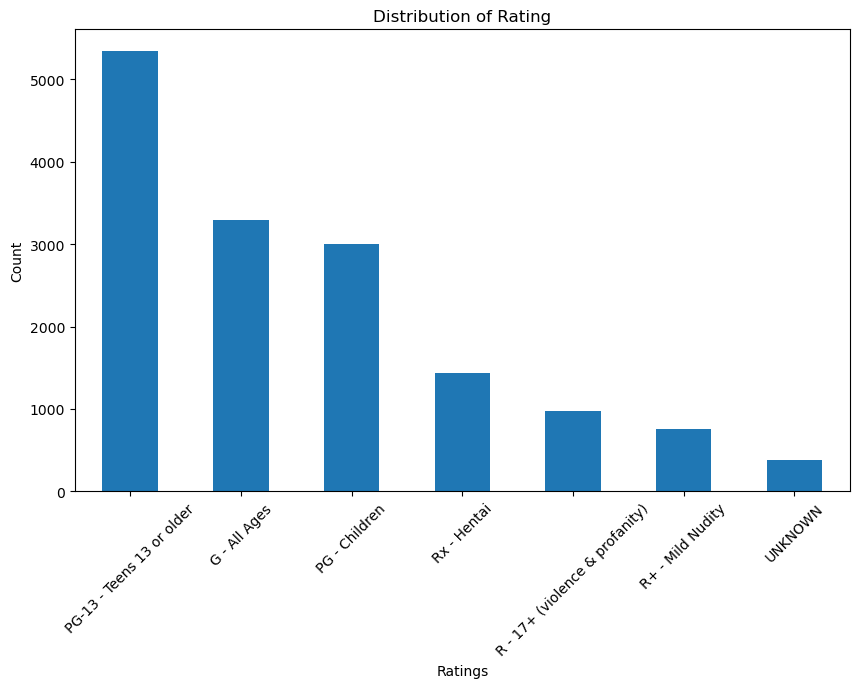

In [45]:
plt.figure(figsize=(10, 6))
anime_cleaned_df['Rating'].value_counts().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [46]:
# Convert Ratings to Numerical Categorical Data to represent the Age Rating
# Initialize Label Encoder from sklearn for Source
anime_cleaned_df['Rating Code'] = label_encoder.fit_transform(anime_cleaned_df['Rating'])
print(label_encoder.classes_)

# Fill the UNKNOWN values of Rating/Rating Code with the Mode
ratingMode = anime_cleaned_df['Rating Code'].mode()[0] # Get the Mode
anime_cleaned_df['Rating Code'] = anime_cleaned_df['Rating Code'].replace(6, ratingMode)

# Drop the Rating Column from data frame
anime_cleaned_df = anime_cleaned_df.drop(['Rating'], axis=1)

['G - All Ages' 'PG - Children' 'PG-13 - Teens 13 or older'
 'R - 17+ (violence & profanity)' 'R+ - Mild Nudity' 'Rx - Hentai'
 'UNKNOWN']


In [47]:
# Filter rows where 'Rating Code' is 6
filtered_df = anime_cleaned_df[anime_cleaned_df['Rating Code'] == 6]
filtered_df

,anime_id,Name,English name,Score,Synopsis,Type,Episodes,Aired,Premiered,Status,Source,Rank,Popularity,Favorites,Scored By,Members,Image URL,Start Date,End Date,Status Code,Source Code,Duration_Minutes,Rating Code


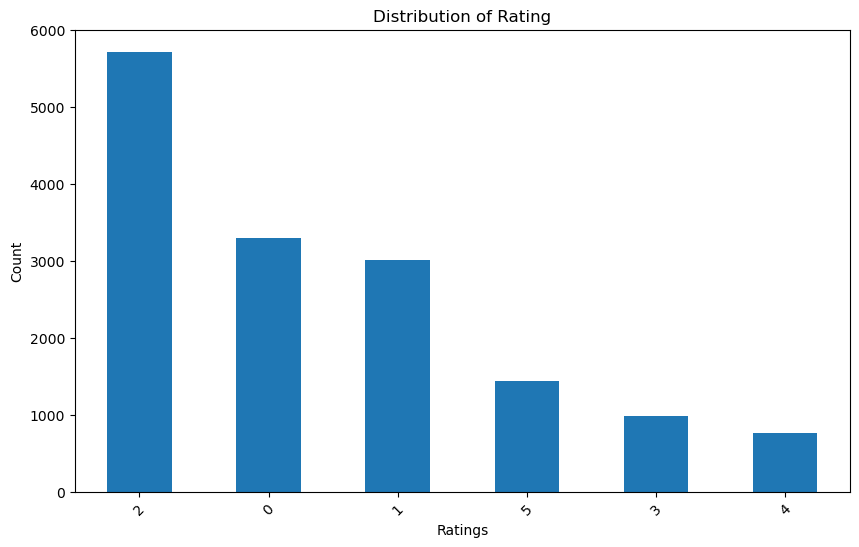

In [48]:
plt.figure(figsize=(10, 6))
anime_cleaned_df['Rating Code'].value_counts().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [49]:
print(anime_cleaned_df.dtypes)
anime_cleaned_df

anime_id                     int64
Name                        object
English name                object
Score                      float64
Synopsis                    object
Type                        object
Episodes                    object
Aired                       object
Premiered                   object
Status                      object
Source                      object
Rank                        object
Popularity                   int64
Favorites                    int64
Scored By                   object
Members                      int64
Image URL                   object
Start Date          datetime64[ns]
End Date            datetime64[ns]
Status Code                  int64
Source Code                  int64
Duration_Minutes           float64
Rating Code                  int64
dtype: object


,anime_id,Name,English name,Score,Synopsis,Type,Episodes,Aired,Premiered,Status,Source,Rank,Popularity,Favorites,Scored By,Members,Image URL,Start Date,End Date,Status Code,Source Code,Duration_Minutes,Rating Code
0,1,Cowboy Bebop,1,8.75,"Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Original,41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...,1998-04-03,1999-04-24,1,9,24.0,3
2,6,Trigun,1,8.22,"Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Finished Airing,Manga,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...,1998-04-01,1998-09-30,1,5,24.0,2
3,7,Witch Hunter Robin,1,7.25,Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",summer 2002,Finished Airing,Original,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...,2002-07-03,2002-12-25,1,9,25.0,2
4,8,Bouken Ou Beet,Beet the Vandel Buster,6.94,It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",fall 2004,Finished Airing,Manga,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...,2004-09-30,2005-09-29,1,5,23.0,1
5,15,Eyeshield 21,None,7.92,"Shy, reserved, and small-statured, Deimon High...",TV,145.0,"Apr 6, 2005 to Mar 19, 2008",spring 2005,Finished Airing,Manga,688.0,1252,1997,86524.0,177688,https://cdn.myanimelist.net/images/anime/1079/...,2005-04-06,2008-03-19,1,5,23.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24894,55725,4 Week Lovers,None,NaN,Wanna fake-date for 4 weeks?\nDojun's life at ...,ONA,10.0,"Apr 4, 2023 to ?",UNKNOWN,Finished Airing,Web manga,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1443/...,2023-04-04,NaT,1,15,5.0,2
24895,55726,"Die, Please!",None,NaN,I just want to tell him how I feel!\nMina has ...,ONA,UNKNOWN,"May 31, 2023 to ?",UNKNOWN,Finished Airing,Web manga,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1621/...,2023-05-31,NaT,1,15,5.0,0
24900,55731,Wu Nao Monu,None,NaN,<NA>,ONA,15.0,"Jul 4, 2023 to ?",UNKNOWN,Not yet aired,Web manga,UNKNOWN,24723,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1386/...,2023-07-04,NaT,2,15,NaN,2
24901,55732,Bu Xing Si: Yuan Qi,Blader Soul,NaN,<NA>,ONA,18.0,"Jul 27, 2023 to ?",UNKNOWN,Not yet aired,Web novel,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1383/...,2023-07-27,NaT,2,16,NaN,2


In [50]:
# Drop Cleaned Columns that are Represented in a New Column Variable
anime_cleaned_df = anime_cleaned_df.drop(['Aired', 'Status', 'Source'], axis=1)

In [51]:
anime_cleaned_df

,anime_id,Name,English name,Score,Synopsis,Type,Episodes,Premiered,Rank,Popularity,Favorites,Scored By,Members,Image URL,Start Date,End Date,Status Code,Source Code,Duration_Minutes,Rating Code
0,1,Cowboy Bebop,1,8.75,"Crime is timeless. By the year 2071, humanity ...",TV,26.0,spring 1998,41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...,1998-04-03,1999-04-24,1,9,24.0,3
2,6,Trigun,1,8.22,"Vash the Stampede is the man with a $$60,000,0...",TV,26.0,spring 1998,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...,1998-04-01,1998-09-30,1,5,24.0,2
3,7,Witch Hunter Robin,1,7.25,Robin Sena is a powerful craft user drafted in...,TV,26.0,summer 2002,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...,2002-07-03,2002-12-25,1,9,25.0,2
4,8,Bouken Ou Beet,Beet the Vandel Buster,6.94,It is the dark century and the people are suff...,TV,52.0,fall 2004,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...,2004-09-30,2005-09-29,1,5,23.0,1
5,15,Eyeshield 21,None,7.92,"Shy, reserved, and small-statured, Deimon High...",TV,145.0,spring 2005,688.0,1252,1997,86524.0,177688,https://cdn.myanimelist.net/images/anime/1079/...,2005-04-06,2008-03-19,1,5,23.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24894,55725,4 Week Lovers,None,NaN,Wanna fake-date for 4 weeks?\nDojun's life at ...,ONA,10.0,UNKNOWN,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1443/...,2023-04-04,NaT,1,15,5.0,2
24895,55726,"Die, Please!",None,NaN,I just want to tell him how I feel!\nMina has ...,ONA,UNKNOWN,UNKNOWN,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1621/...,2023-05-31,NaT,1,15,5.0,0
24900,55731,Wu Nao Monu,None,NaN,<NA>,ONA,15.0,UNKNOWN,UNKNOWN,24723,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1386/...,2023-07-04,NaT,2,15,NaN,2
24901,55732,Bu Xing Si: Yuan Qi,Blader Soul,NaN,<NA>,ONA,18.0,UNKNOWN,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1383/...,2023-07-27,NaT,2,16,NaN,2
